# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
import koreanize_matplotlib

In [181]:
data = pd.read_table('data/mini.csv', sep = ',')

# 기본 통계량 확인

In [182]:
data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [184]:
data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


### 메타데이터 세부 정의
- 데이터의 정의가 부정확하여 세부 정의 및 가정

* user_id: 사용자의 고유 식별자   
  - 고유 식별 id : unique 10,000

* subscription_duration: 사용자가 서비스에 가입한 기간 (월)   
  - 총 가입한 기간(월 단위) : 최대 23개월, 최소 1개월

* recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)   
  - 마지막으로 로그인한 날짜 : 일단 패스   
    - 최대 29, 최소 1
  
* average_login_time: 사용자의 일반적인 로그인 시간   
  - 일평균 접속시간 = 전체 접속 시간 / 30
  - 최대 27.00, 최소 2.37 : 분 단위로 정의

* average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)   
  - 최대 503.37, 최소 0.01 : 분 단위

* monthly_active_learning_days: 월간 활동적인 학습 일수   
  - 최근 한달간 학습 일수 : 최대 24일, 최소 1일

* total_completed_courses: 완료한 총 코스 수   
  - 수강 완료한 코스 : 최대 27개, 최소 1개

* recent_learning_achievement: 최근 학습 성취도   
  - 최근 한달간 학습 성취도(%) : 학습한 시간 / 제공된 강의 시간 : 최대 112.64%, 최소 35.94%   
    - 반복 재생 등의 사유로 100% 초과 값 발생

* abandoned_learning_sessions: 중단된 학습 세션 수   
  - 중도에 포기한 세션 수 : 최대 12, 최소 0

* community_engagement_level: 커뮤니티 참여도   
  - 참여도 점수 : 1 ~ 5 정수

* preferred_difficulty_level: 선호하는 난이도   
  - 세 가지 난이도 : Low, Medium, High

* subscription_type: 구독 유형   
  - 두 가지 유형 : Basic, Premium
  
* customer_inquiry_history: 고객 문의 이력   
  - 문의 횟수 : 최대 10, 최소 0

* payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.   
  - 7: 3개월 모두 결제함
  - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
  - 5: 첫 달과 마지막 달에 결제함
  - 4: 첫 달에만 결제함
  - 3: 마지막 2개월에 결제함
  - 2: 가운데 달에만 결제함
  - 1: 마지막 달에만 결제함
  - 0: 3개월 동안 결제하지 않음

* target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄   
  - 다음 달 구독 유지 여부 : 6199명 구독 유지, 3801명 구독 취소

preferred_difficulty_level: 선호하는 난이도 / subscription_type: 구독 유형 - 숫자로 변경

In [185]:
difficulty_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['preferred_difficulty_level'] = data['preferred_difficulty_level'].map(difficulty_mapping)

subscription_mapping = {'Basic': 0, 'Premium': 1}
data['subscription_type'] = data['subscription_type'].map(subscription_mapping)

data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,1,0,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,2,0,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,2,1,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,1,0,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,2,0,3,0,1


In [186]:
data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,1.700800,0.402100,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,0.780859,0.490346,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,0.000000,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,2.000000,1.000000,3.000000,6.000000,1.000000


## EDA
- 각 숫자 데이터들을 시각화

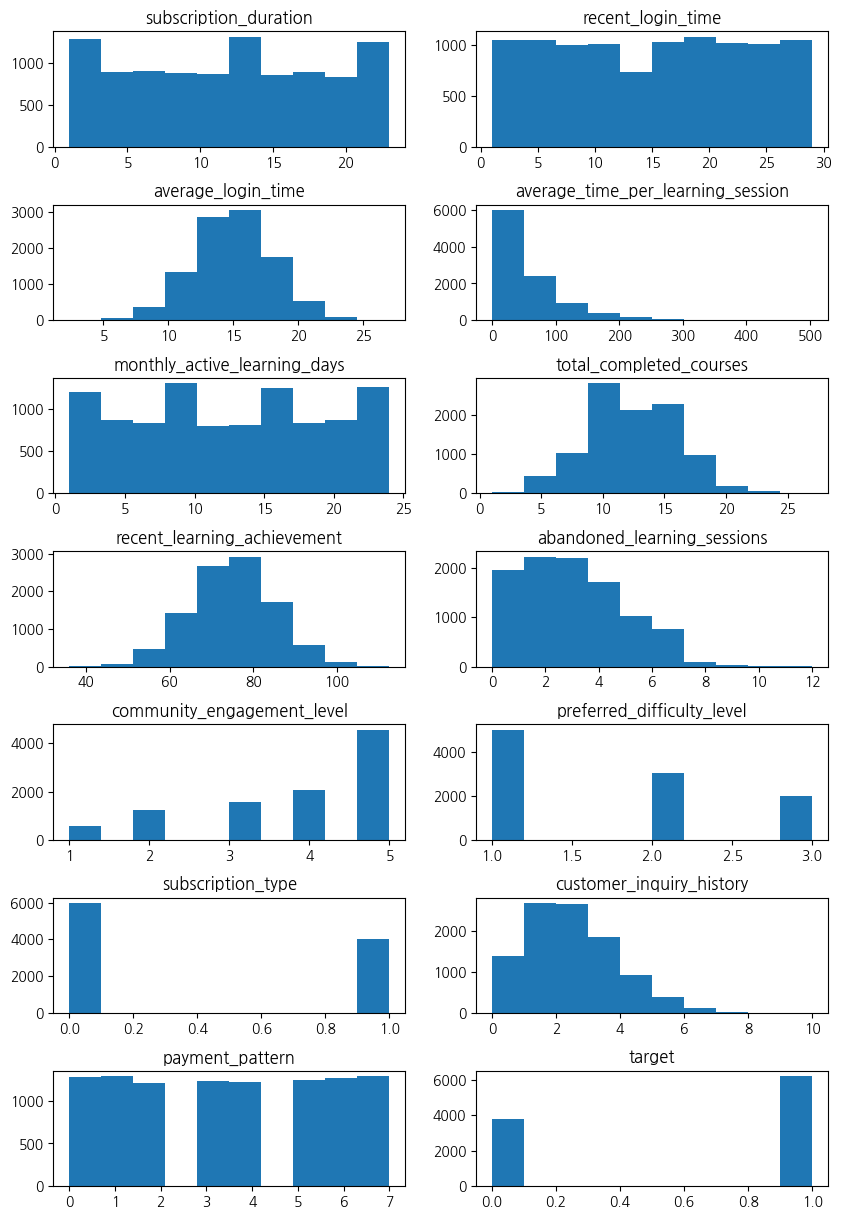

In [187]:
fig, axs = plt.subplots(7, 2, figsize=(10, 15))

axs[0, 0].hist(data['subscription_duration'].values, bins=10)
axs[0, 0].set_title('subscription_duration')

axs[0, 1].hist(data['recent_login_time'].values, bins=10)
axs[0, 1].set_title('recent_login_time')

axs[1, 0].hist(data['average_login_time'].values, bins=10)
axs[1, 0].set_title('average_login_time')

axs[1, 1].hist(data['average_time_per_learning_session'].values, bins=10)
axs[1, 1].set_title('average_time_per_learning_session')

axs[2, 0].hist(data['monthly_active_learning_days'].values, bins=10)
axs[2, 0].set_title('monthly_active_learning_days')

axs[2, 1].hist(data['total_completed_courses'].values, bins=10)
axs[2, 1].set_title('total_completed_courses')

axs[3, 0].hist(data['recent_learning_achievement'].values, bins=10)
axs[3, 0].set_title('recent_learning_achievement')

axs[3, 1].hist(data['abandoned_learning_sessions'].values, bins=10)
axs[3, 1].set_title('abandoned_learning_sessions')

axs[4, 0].hist(data['community_engagement_level'].values, bins=10)
axs[4, 0].set_title('community_engagement_level')

axs[4, 1].hist(data['preferred_difficulty_level'].values, bins=10)
axs[4, 1].set_title('preferred_difficulty_level')

axs[5, 0].hist(data['subscription_type'].values, bins=10)
axs[5, 0].set_title('subscription_type')

axs[5, 1].hist(data['customer_inquiry_history'].values, bins=10)
axs[5, 1].set_title('customer_inquiry_history')

axs[6, 0].hist(data['payment_pattern'].values, bins=10)
axs[6, 0].set_title('payment_pattern')

axs[6, 1].hist(data['target'].values, bins=10)
axs[6, 1].set_title('target')


fig.subplots_adjust(hspace=0.5)
plt.show()

## EDA 결과

* subscription_duration: 사용자가 서비스에 가입한 기간 (월)   
  - 각 기간은 비슷하나, 세 번의 급등 기간 있음. 특정 시점에 프로모션 등으로 구독자 급증 및 유지된 것으로 추정.
  - 최근, 1년전, 2년전 경으로 파악.
  - 분석 목적과 매우 연관 있을 것으로 예상

* recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)   
  - 마지막으로 로그인한 날짜(?) 빈도가 1~29 거의 비슷.
  - 중간에 살짝 적은 날도 있지만, 해당 데이터로 최근 날짜를 파악하는 것은 무리. 분석에 활용하기 어려울 것으로 판단
  
* average_login_time: 사용자의 일반적인 로그인 시간   
  - 평균 접속시간은 15분 정도.
  - 분석 목적과 매우 연관 있을 것으로 예상.

* average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)   
  - 최대값과 최소값의 차이가 매우 큼.
  - 단위가 분으로 정의되어 있음. 5분 이내 값이 제일 많음. 이유는 모르겠음.
  - 세션에 머무르는 시간이 일반적으로 짧음. 학습 과정 중 각 페이지 정도로 판단.
  - 분석 목적과 어느정도 연관 있을 것으로 예상. 

* monthly_active_learning_days: 월간 활동적인 학습 일수   
  - 평균 12일 접속
  - 평이한 그래프
  - 분석 목적과 매우 연관 있을 것으로 예상.

* total_completed_courses: 완료한 총 코스 수   
  - 평균 12개 코스 완료
  - 분석 목적과 어느정도 연관 있을 것으로 예상

* recent_learning_achievement: 최근 학습 성취도   
  - 보통 70~80% 성취도
  - 분석 목적과 어느정도 연관 있을 것으로 예상

* abandoned_learning_sessions: 중단된 학습 세션 수   
  - 보통 0 ~ 3개
  - 코스 퀄리티 및 관심도에 따라 영향
  - 분석 목적과 어느정도 연관 있을 것으로 예상

* community_engagement_level: 커뮤니티 참여도   
  - 5가 제일 많고 점차 줄어드는 모양
  - 커뮤니티에 많이 참여할수록 1에 가까울 것으로 추정
  - 분석 목적과 어느정도 연관 있을 것으로 예상

* preferred_difficulty_level: 선호하는 난이도 
  - Low가 제일 많고, Medium, High 순서
  - 분석 목적과는 크게 연관이 있을 것 같지는 않으나 조금 더 지켜봐야 할 듯

* subscription_type: 구독 유형   
  - 6 : 4 정도의 비율로 Basic이 더 많음
  - 분석 목적과 어느정도 연관 있을 것으로 예상
  
* customer_inquiry_history: 고객 문의 이력   
  - 보통 0 ~ 3 회
  - 분석 목적과 연관성이 크지는 않을 것으로 예상

* payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.   
  - 모든 패턴의 비율이 비슷함
  - 현재 구독되어 있음에도 최근 3개월 내 결제내역이 없는 경우가 있는 것으로 보아, 구독 기간을 1, 3, 6, 12개월 등으로 설정할 수 있을 것
  - 비율이 모두 비슷해서 분석에 크게 영향을 줄 것 같지는 않으나, 목적 자체와는 어느정도 연관이 있어 보임

* target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄   
  - 이번 분석에서의 결과값
  - target과 연관성이 큰 데이터를 찾는 것이 관건
  - 관련이 큰 데이터에 영향을 줄 수 있는 마케팅 등으로 구독 유지율 높일 수 있을 것으로 기대

### 각 데이터들 간의 상관관계 분석

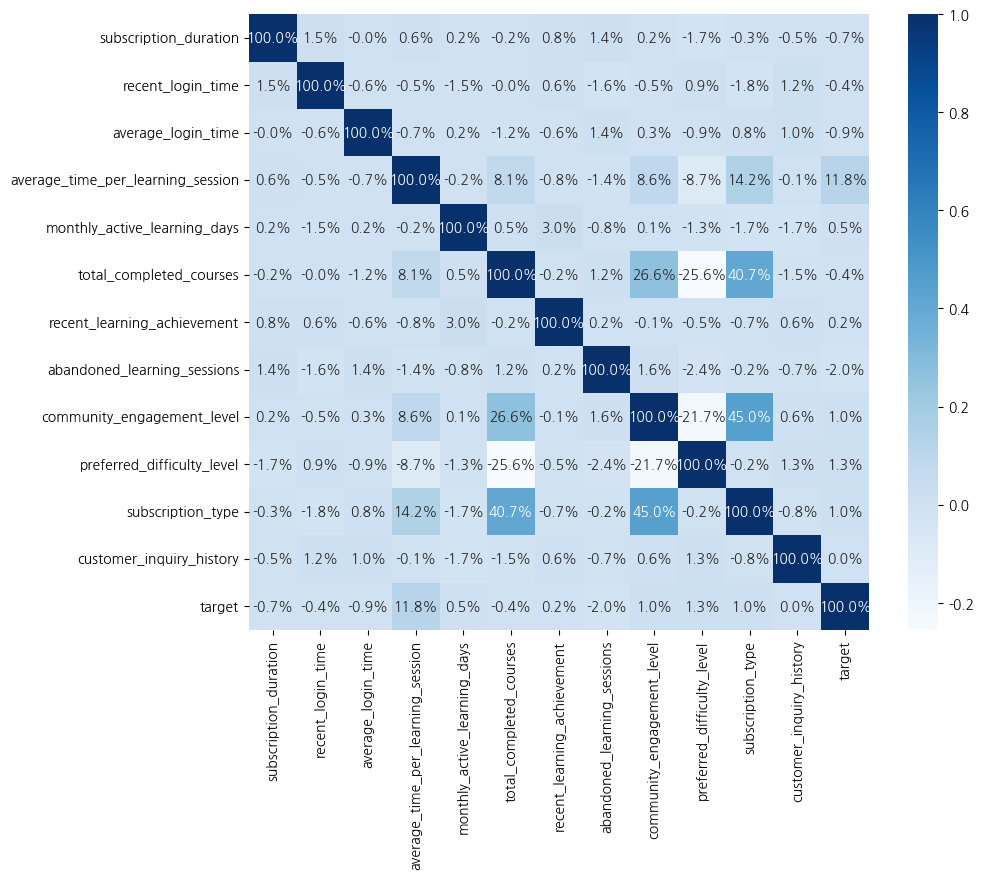

In [188]:
plt.figure(figsize=(10, 8))

data_num = data[['subscription_duration', 'recent_login_time', 'average_login_time', 'average_time_per_learning_session', 'monthly_active_learning_days', 
             'total_completed_courses', 'recent_learning_achievement', 'abandoned_learning_sessions', 'community_engagement_level', 'preferred_difficulty_level', 'subscription_type', 'customer_inquiry_history', 'target']]
corr = data_num.corr()
sns.heatmap(corr, annot=True, fmt=".1%", cmap='Blues')
plt.show()

# 가설 설정
- 가설 1: 학습 세션의 평균 시간
    - 가설: 학습 세션에 더 많은 시간을 투자하는 사용자는 구독을 연장할 가능성이 높다.
    - 근거: average_time_per_learning_session과 target 간의 상관 계수는 11.8%로 상대적으로 다른 변수들에 비해 높음

- 가설 2: 구독 유형
    - 가설: 프리미엄 구독 사용자는 구독을 연장할 가능성이 높다.
    - 근거: subscription_type과 target 간의 상관 계수는 1%로 나타나며, 프리미엄 구독 사용자가 더 많은 가치를 느껴 구독을 연장할 가능성이 있음. target 간 상관계수가 가장 높은 average_time_per_learning_session 간의 상관 계수도 높음

- 가설 3: 총 완료한 코스 수
    - 가설: 많은 코스를 완료한 사용자는 구독을 연장할 가능성이 낮다.
    - 근거: total_completed_courses와 target 간의 상관 계수는 -0.4%로 나타나며, 코스를 완료한 경험이 많을수록 구독을 연장할 가능성이 낮을 것

- 가설 4: 커뮤니티 참여도
    - 가설: 커뮤니티 참여도가 높은 사용자는 구독을 연장할 가능성이 높다.
    - 근거: community_engagement_level과 target 간의 상관 계수는 1%로 나타나며, 커뮤니티에 적극적으로 참여하는 사용자는 더 많은 가치를 느낄 수 있음. EDA와는 반대로 숫자가 클수록 참여도가 높을 것으로 추정

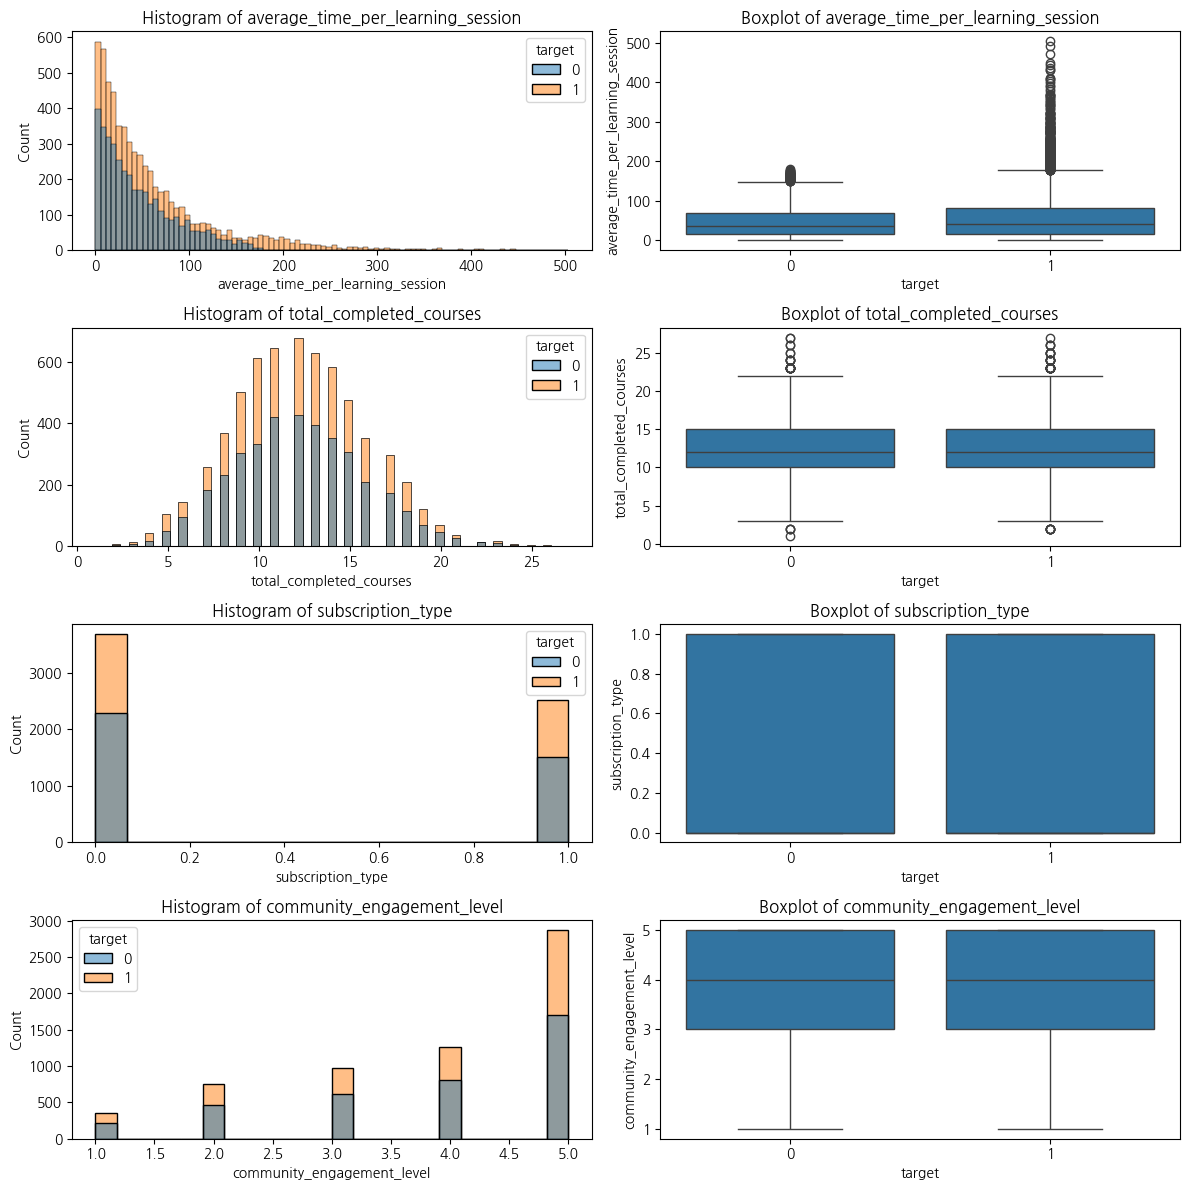

In [189]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
sns.histplot(data=data, x='average_time_per_learning_session', hue='target')
plt.title('Histogram of average_time_per_learning_session')

plt.subplot(4, 2, 2)
sns.boxplot(data=data, x='target', y='average_time_per_learning_session')
plt.title('Boxplot of average_time_per_learning_session')

plt.subplot(4, 2, 3)
sns.histplot(data=data, x='total_completed_courses', hue='target')
plt.title('Histogram of total_completed_courses')

plt.subplot(4, 2, 4)
sns.boxplot(data=data, x='target', y='total_completed_courses')
plt.title('Boxplot of total_completed_courses')

plt.subplot(4, 2, 5)
sns.histplot(data=data, x='subscription_type', hue='target')
plt.title('Histogram of subscription_type')

plt.subplot(4, 2, 6)
sns.boxplot(data=data, x='target', y='subscription_type')
plt.title('Boxplot of subscription_type')

plt.subplot(4, 2, 7)
sns.histplot(data=data, x='community_engagement_level', hue='target')
plt.title('Histogram of community_engagement_level')

plt.subplot(4, 2, 8)
sns.boxplot(data=data, x='target', y='community_engagement_level')
plt.title('Boxplot of community_engagement_level')

plt.tight_layout()
plt.show()

In [190]:
a = ['average_time_per_learning_session', 'total_completed_courses', 'subscription_type', 'community_engagement_level']

mean_values = data.groupby('target')[a].mean()
median_values = data.groupby('target')[a].median()

mean_df = mean_values.reset_index(drop=True)
median_df = median_values.reset_index(drop=True)

print('평균')
mean_df


평균


,average_time_per_learning_session,total_completed_courses,subscription_type,community_engagement_level
0,46.456986,12.246251,0.395948,3.870560
1,60.105533,12.216003,0.405872,3.895628


In [191]:
print('중앙값')
median_df

중앙값


,average_time_per_learning_session,total_completed_courses,subscription_type,community_engagement_level
0,34.773346,12.0,0.0,4.0
1,39.705116,12.0,0.0,4.0


# 가설 검증
- 가설 1: 학습 세션에 더 많은 시간을 투자하는 사용자는 구독을 연장할 가능성이 높다.
    - 그래프 해석
        - Histogram: 구독 여부에 따라 분포에 약간의 차이가 보임. 주황색 분포가 파란색 분포보다 더 크고 긴 꼬리를 가짐.
        - Boxplot: 구독을 연장한 사용자의 중앙값이 약간 더 높고, 분포가 약간 더 넓음
    - 결론: 위 그래프와 가설이 일치한다고 볼 수 있다. 따라서, 학습 세션에 평균적으로 더 많은 시간을 투자하는 사용자는 구독을 연장할 가능성이 높다.

- 가설 2: 프리미엄 구독 사용자는 구독을 연장할 가능성이 높다.
    - 그래프 해석
        - Histogram: 분포가 거의 동일
        - Boxplot: 분포가 거의 동일
    - 결론: 위 그래프와 가설은 일치하지 않는다. 따라서, 프리미엄 구독 사용자가 구독을 연장할 가능성이 높다고 볼 수 없다.

- 가설 3: 많은 코스를 완료한 사용자는 구독을 연장할 가능성이 낮다.
    - 그래프 해석
        - Histogram: 분포가 거의 동일
    - 결론: 위 그래프와 가설은 일치하지 않는다. 따라서, 완료한 코스 수가 많을수록 구독을 연장할 가능성이 낮다고 볼 수 없다.

- 가설 4: 커뮤니티 참여도가 높은 사용자는 구독을 연장할 가능성이 높다.
    - 그래프 해석
        - Histogram: 분포가 거의 동일
        - Boxplot: 분포가 거의 동일
    - 결론: 위 그래프와 가설은 일치하지 않는다. 따라서, 커뮤니티 참여도가 높은 사용자가 구독을 연장할 가능성이 높다고 볼 수 없다.

# 최종 결론
- 가설 1은 그래프와 일치하여, 학습 세션에 평균적으로 더 많은 시간을 투자하는 사용자는 구독을 연장할 가능성이 높다고 볼 수 있다.

- 가설 2, 3, 4는 그래프와 일치하지 않으며, 구독 유형, 완료한 코스 수, 커뮤니티 참여도는 구독 연장 여부에 큰 영향을 미치지는 않을 것으로 볼 수 있다.
- 따라서, 세션에 많은 시간을 투자하는 사람을 기준으로 전략을 세우는 것이 타당하겠으나, 명확한 차이를 보인다고 판단하기는 어려워 데이터를 조금 더 종합적으로 분석해볼 필요가 있다.
- 각 데이터와 target 간의 직접적인 영향은 대부분 미미했지만, 유일하게 유의미한 연관성을 보였던 학습 세션에 투입하는 평균 시간과 다른 데이터 간의 상관관계를 보았을 때 몇몇 데이터는 target에 간접적인 영향을 줄 수도 있을 것으로 판단된다.
- 그중에서도 커뮤니티 참여도가 여러 데이터들과 연관성이 높은 것으로 확인된다. 커뮤니티 참여도가 높을수록 낮은 난이도를 선호하는 주니어 레벨의 사용자이며, 따라서 조금 더 많은 코스를 수강하고, 프리미엄 구독자인 경우가 많다고 볼 수 있다. 또한 가설 1에서 연관성이 입증된 각 학습 세션에 소요된 평균 시간과도 양의 상관관계를 갖는다.
- 이를 종합적으로 판단하여 구독 유지 전략을 세울 필요가 있다.